In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cifar10/data_batch_1
/kaggle/input/cifar10/data_batch_2
/kaggle/input/cifar10/batches.meta
/kaggle/input/cifar10/test_batch
/kaggle/input/cifar10/data_batch_3
/kaggle/input/cifar10/data_batch_5
/kaggle/input/cifar10/data_batch_4


In [2]:
#importing neccessary libraries
import torch
import torchvision
import torchvision.transforms as transforms
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# DATASET: CIFAR10
The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes.

In [3]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(), 
    transforms.RandomCrop(32, padding=4),  
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
train_dataset = torchvision.datasets.CIFAR10(root='./data', transform = transform, train=True,  download=True)
test_dataset = torchvision.datasets.CIFAR10(root='./data',transform = transform, train=False, download=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)



  0%|          | 0/170498071 [00:00<?, ?it/s]


  0%|          | 65536/170498071 [00:00<07:54, 359247.08it/s]


  0%|          | 229376/170498071 [00:00<04:12, 674131.37it/s]


  1%|          | 917504/170498071 [00:00<01:21, 2076753.90it/s]


  2%|▏         | 2686976/170498071 [00:00<00:27, 6170074.78it/s]


  3%|▎         | 5439488/170498071 [00:00<00:13, 11982697.83it/s]


  5%|▌         | 9076736/170498071 [00:00<00:08, 18802851.28it/s]


  7%|▋         | 12648448/170498071 [00:00<00:06, 23615307.65it/s]


  9%|▉         | 16187392/170498071 [00:01<00:06, 23445133.20it/s]


 12%|█▏        | 19791872/170498071 [00:01<00:05, 26759073.30it/s]


 14%|█▎        | 23396352/170498071 [00:01<00:05, 29259123.71it/s]


 16%|█▌        | 26542080/170498071 [00:01<00:04, 29657100.76it/s]


 17%|█▋        | 29687808/170498071 [00:01<00:04, 29867774.72it/s]


 20%|█▉        | 33292288/170498071 [00:01<00:04, 31631598.43it/s]


 22%|██▏       | 36896768/170498071 [00:01<00:04, 32903949.34it/s]


 24%|██▍       | 40501248/170498071 [00:01<00:03, 33800803.77it/s]


 26%|██▌       | 43974656/170498071 [00:01<00:03, 34056050.24it/s]


 28%|██▊       | 47415296/170498071 [00:02<00:03, 32257306.64it/s]


 30%|██▉       | 50855936/170498071 [00:02<00:03, 32830903.67it/s]


 32%|███▏      | 54460416/170498071 [00:02<00:03, 31881735.56it/s]


 34%|███▍      | 57704448/170498071 [00:02<00:03, 31295866.65it/s]


 36%|███▌      | 60882944/170498071 [00:02<00:03, 31165347.39it/s]


 38%|███▊      | 64192512/170498071 [00:02<00:03, 31703624.57it/s]


 40%|███▉      | 67469312/170498071 [00:02<00:03, 31887354.12it/s]


 42%|████▏     | 71073792/170498071 [00:02<00:03, 33075385.88it/s]


 44%|████▍     | 74711040/170498071 [00:02<00:02, 34029178.04it/s]


 46%|████▌     | 78184448/170498071 [00:02<00:02, 34236221.23it/s]


 48%|████▊     | 81625088/170498071 [00:03<00:02, 33075545.69it/s]


 50%|████▉     | 84967424/170498071 [00:03<00:02, 33005267.13it/s]


 52%|█████▏    | 88276992/170498071 [00:03<00:02, 32959514.54it/s]


 54%|█████▍    | 91914240/170498071 [00:03<00:02, 33444993.90it/s]


 56%|█████▌    | 95289344/170498071 [00:03<00:02, 33242759.12it/s]


 58%|█████▊    | 98631680/170498071 [00:03<00:02, 32668356.69it/s]


 60%|█████▉    | 101908480/170498071 [00:03<00:02, 32390368.68it/s]


 62%|██████▏   | 105283584/170498071 [00:03<00:02, 32448008.85it/s]


 64%|██████▎   | 108560384/170498071 [00:03<00:01, 31728050.02it/s]


 66%|██████▌   | 111837184/170498071 [00:04<00:01, 31990908.40it/s]


 68%|██████▊   | 115113984/170498071 [00:04<00:01, 32131070.44it/s]


 70%|██████▉   | 118751232/170498071 [00:04<00:01, 33348755.89it/s]


 72%|███████▏  | 122355712/170498071 [00:04<00:01, 34125480.21it/s]


 74%|███████▍  | 125829120/170498071 [00:04<00:01, 34074374.89it/s]


 76%|███████▌  | 129269760/170498071 [00:04<00:01, 32810103.61it/s]


 78%|███████▊  | 132612096/170498071 [00:04<00:01, 32961244.09it/s]


 80%|███████▉  | 136183808/170498071 [00:04<00:01, 33764690.85it/s]


 82%|████████▏ | 139591680/170498071 [00:04<00:00, 33588107.75it/s]


 84%|████████▍ | 142966784/170498071 [00:04<00:00, 32807292.81it/s]


 86%|████████▌ | 146309120/170498071 [00:05<00:00, 32466607.64it/s]


 88%|████████▊ | 149585920/170498071 [00:05<00:00, 32030923.66it/s]


 90%|████████▉ | 152895488/170498071 [00:05<00:00, 32316247.97it/s]


 92%|█████████▏| 156139520/170498071 [00:05<00:00, 31987956.05it/s]


 94%|█████████▎| 159481856/170498071 [00:05<00:00, 32251051.26it/s]


 95%|█████████▌| 162791424/170498071 [00:05<00:00, 32402610.55it/s]


 98%|█████████▊| 166395904/170498071 [00:05<00:00, 33455757.87it/s]


100%|█████████▉| 169869312/170498071 [00:05<00:00, 33804961.52it/s]


100%|██████████| 170498071/170498071 [00:05<00:00, 29529171.87it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data


Files already downloaded and verified


Details about the dataset:

In [4]:
print("Total samples:", len(train_dataset) + len(test_dataset))
print("Number of classes:", len(train_dataset.classes))
print("Classes:", train_dataset.classes)

Total samples: 60000
Number of classes: 10
Classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [5]:
first_image_shape = train_dataset[0][0].shape
print("Shape of the first image:", first_image_shape)


Shape of the first image: torch.Size([3, 32, 32])


Each image in the dataset has 3 colour channels (RBG) and are of 32x32 dimensions.

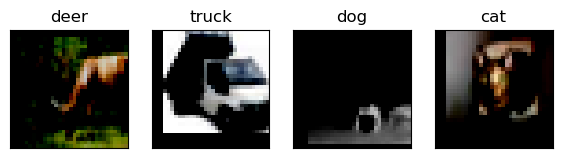

In [6]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Get a batch of images and labels
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Convert images to numpy arrays for display
images = images.numpy()

# Plot the images in the batch along with the corresponding labels
fig = plt.figure(figsize=(7, 4))
for idx in np.arange(4):
    ax = fig.add_subplot(1, 4, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    ax.set_title(classes[labels[idx]])
plt.show()

In [7]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(torch.cuda.is_available())

def accuracy():
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
    return format(100 * correct / total)

    
def load_dataset(batch_size):
    train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, transform=transform, download=True)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    
def train_model(epochs,lr):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(net.parameters(), lr=lr)
    # Training loop
    for epoch in range(epochs):
        net.train()
        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch [{epoch + 1}/{epochs}] - Loss: {running_loss / len(train_loader):.4f}")

True


# Why DL and not just ML models for image classification?

In [ ]:
train_dataset = torchvision.datasets.CIFAR10(root='./data', transform = transform, train=True,  download=True)
test_dataset = torchvision.datasets.CIFAR10(root='./data',transform = transform, train=False, download=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=len(train_dataset), shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=False)

# Convert dataset to numpy arrays
x_train = []
y_train = []
for data in train_loader:
    images, labels = data
    x_train = images.numpy()
    y_train = labels.numpy()

x_test = []
y_test = []
for data in test_loader:
    images, labels = data
    x_test = images.numpy()
    y_test = labels.numpy()

x_train2 = x_train.reshape((len(x_train), -1))
x_test2 = x_test.reshape((len(x_test), -1))

# Train Random Forest Classifier
model = RandomForestClassifier()
model.fit(x_train2, y_train)

# Predict and evaluate
y_pred = model.predict(x_test2)
accuracy = accuracy_score(y_pred, y_test)
print("Accuracy:", accuracy)
print(classification_report(y_pred, y_test))


Even a RandomForestClassifier gives only 47% accuracy even with normalizing the data properly, hence proving the inaccuracy of ML models with unstructered and spacial data.

# Starting with Neural networks

In [ ]:

load_dataset(64)

#A NN with no convolutional layers
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(32 * 32 * 3, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
    
    def forward(self, x):
        x = x.view(-1, 32 * 32 * 3)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net().to(device)
train_model(10,0.001)
accuracy()

The accuracy is still only 26% suggesting that the NNs don't take the spacial structure of the input images into account. So, we add  convolutional layers to flatten the images into a single vector which can be passed into the dense layer.

In [ ]:

#preprocessing the images
transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

load_dataset(64)

#Defining a CNN with 3 convolutional layers
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc = nn.Linear(128 * 4 * 4, 10)  

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 128 * 4 * 4)
        x = self.fc(x)
        return x
    
net = Net().to(device)
train_model(10,0.001)
accuracy()

A simple CNN with 3 convolutional layers with appropriate hyper parameters ( will be explain below), yields an accuracy of 71%.

**Hyperparameters:**
* batch_size: the number of observations that will be passed to the NN at each training step, increasing the batch_size results in lesser number of parameter updates hence speeding up the convergence.
* learning_rate: the step size taken during optimization, a bigger lr could result in jumping of the values above the minima.
* epochs: the number of times the full training data is shown to the NN. Epochs is set to the least value before the loss starts taking negligible changes in its value.


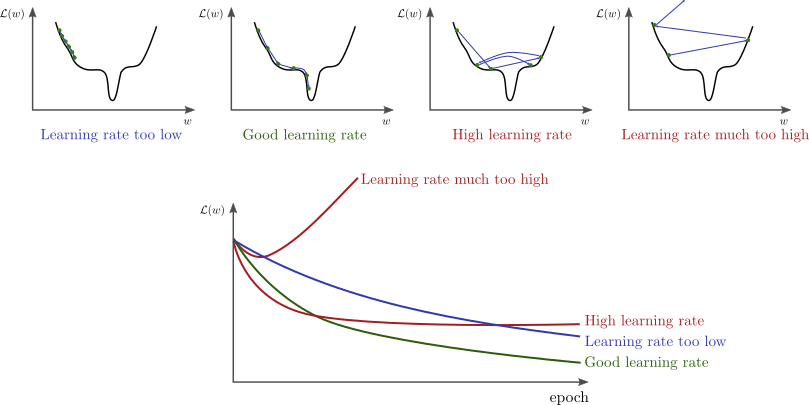

In [ ]:
# Load CIFAR-10 dataset and normalize
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
load_dataset(16)

# Define the neural network with 9 layers
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.conv5 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(512 * 1 * 1, 256)  # Adjusted input size
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)  # 10 classes in CIFAR-10

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = self.pool(F.relu(self.conv5(x)))
        x = x.view(-1, 512 * 1 * 1)  # Adjusted flattening
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# Instantiate the network and move it to the GPU
net = Net().to(device)
train_model(20,0.001)
accuracy()


A 9 layer NN gives almost the same accuracy than a 3 layer one we built earlier, proving that, increasing the layers is not doing much improvement to this NN.

Hence, decreasing the layers but increasing the NN complexity might give better results

In [ ]:
results_df

Table shows that a learning rate of 0.001 and a batch_size of 64 yeilds the best accuracy for this model.

In [ ]:
# Define the neural network 6 layers
class NetF(nn.Module):
    def __init__(self):
        super(NetF, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(256 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10) 

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = self.pool(nn.functional.relu(self.conv3(x)))
        x = x.view(-1, 256 * 4 * 4)
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = NetF().to(device)
train_model(20,0.001)
accuracy()


In [ ]:
import pandas as pd

# Define hyperparameters to tune
learning_rates = [0.0001, 0.001, 0.01, 0.1]
batch_sizes = [64, 32]

results = []

for lr in learning_rates:
    for batch_size in batch_sizes:
        # Load dataset
        train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
        
        #training the model
        net = NetF().to(device)
        train_model(20, lr)
        
        #Calculating accuracy
        acc = accuracy()
        
        results.append({'Learning Rate': lr, 'Batch Size': batch_size, 'Accuracy': acc})
        print("done")
# Create a DataFrame from the results
results_df = pd.DataFrame(results)
print(results_df)

This model gives an accuracy of around 81%

# Analyzing the model's performance

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Set the network to evaluation mode
net.eval()

predicted_labels = []
true_labels = []

# Iterate through the test dataset and collect predicted and true labels
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        predicted_labels.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

# Calculate the confusion matrix
conf_mat = confusion_matrix(true_labels, predicted_labels)

# Define class names
class_names = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
cfmt = pd.DataFrame(conf_mat, index=class_names, columns=class_names)
sns.heatmap(cfmt, annot=True, cmap='BuGn', fmt="d")
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.title("Confusion Matrix", fontsize=16)
plt.show()


We can see that 179 dogs have been predicted as cats and 68 planes have been identified as birds. This data gives an inference that these predictions are not entirely going wrong. The NN is yet to efficiently predict between 2 identical classes.
> Using autoencoders could enhance the input images hence making it easy for the NN to predict between identical classes.

In [ ]:
import matplotlib.pyplot as plt

def plot_loss(loss_values):
    plt.figure(figsize=(7, 4))
    plt.plot(loss_values, label='Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss Over Epochs')
    plt.legend()
    plt.show()

# Tstoring loss values
loss_values = []
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)
for epoch in range(20):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    loss_values.append(running_loss / len(train_loader))

# Plot the loss values
plot_loss(loss_values)


The loss vs epochs chart resembles the good learning rate graph above proving that the model is tuned well.

In [ ]:
def plot_accuracy(accuracy_values):
    plt.figure(figsize=(10, 6))
    plt.plot(accuracy_values, label='Test Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.title('Test Accuracy Over Epochs')
    plt.legend()
    plt.show()

#storing accuracy values
accuracy_values = []
for epoch in range(20):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    accuracy_values.append(accuracy())

# Plot the accuracy values
plot_accuracy(accuracy_values)